<a href="https://colab.research.google.com/github/malakbayramovaa/Machine-Learning/blob/main/End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#California Housing Prices

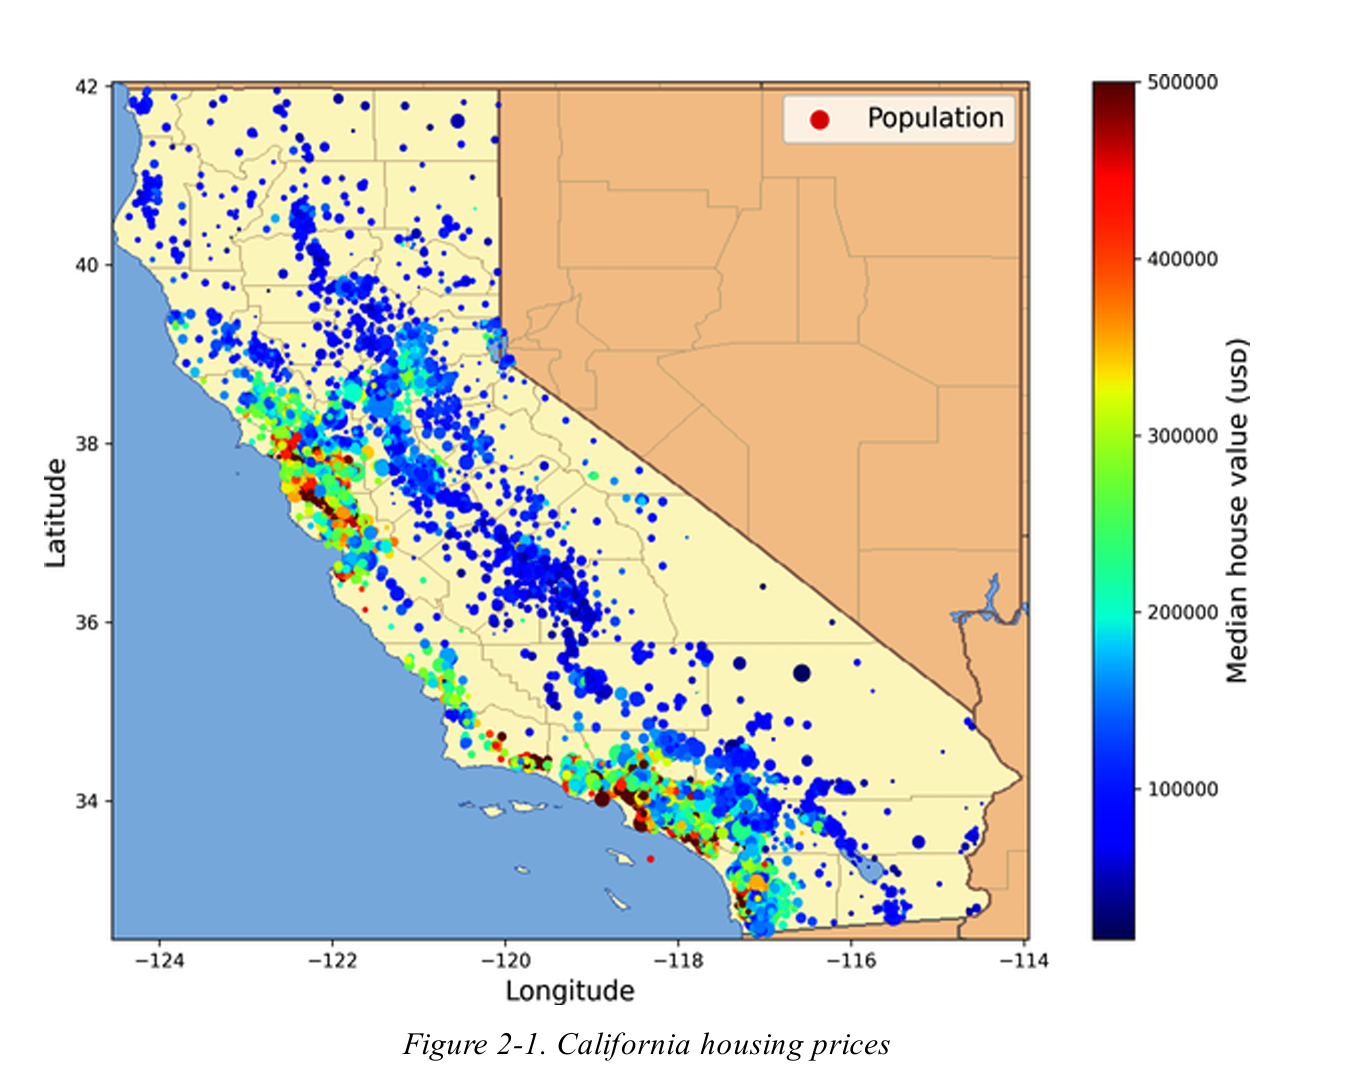

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

/tmp/ipython-input-266164749.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


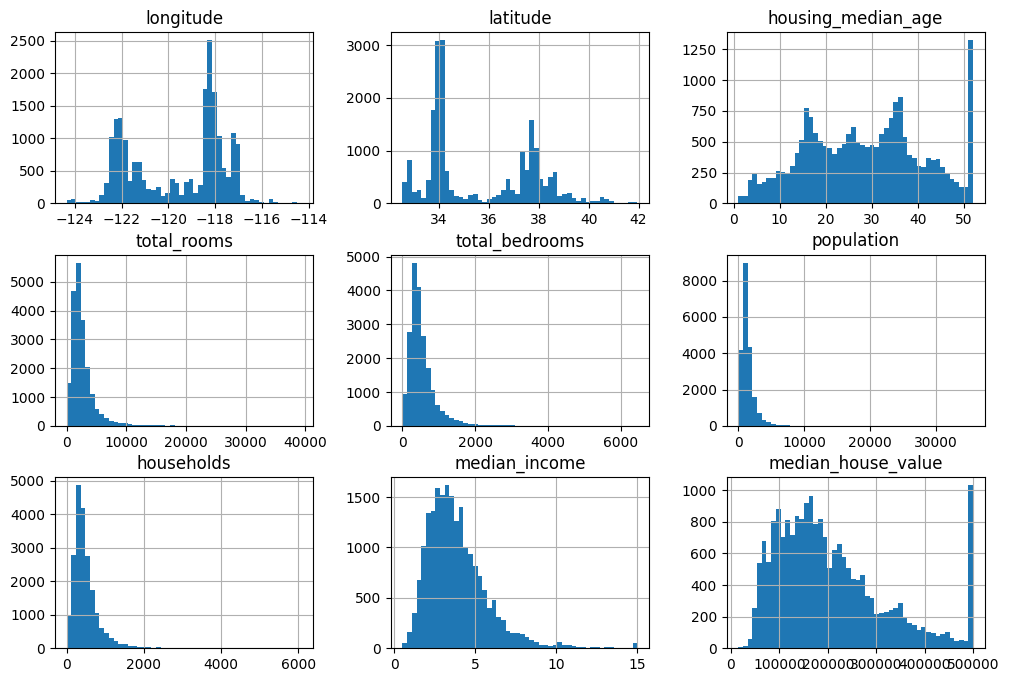

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [8]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set=shuffle_and_split_data(housing,0.2)

In [10]:
len(train_set)

16512

In [11]:
len(test_set)

4128

In [12]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32
def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id=housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'index')

In [14]:
housing_with_id['id']=housing['longitude'] * 1000 + housing['latitude']
train_set, test_set=split_data_with_id_hash(housing_with_id, 0.2, 'id')

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set =train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
housing['income_cat']=pd.cut(housing['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1,2,3,4,5])

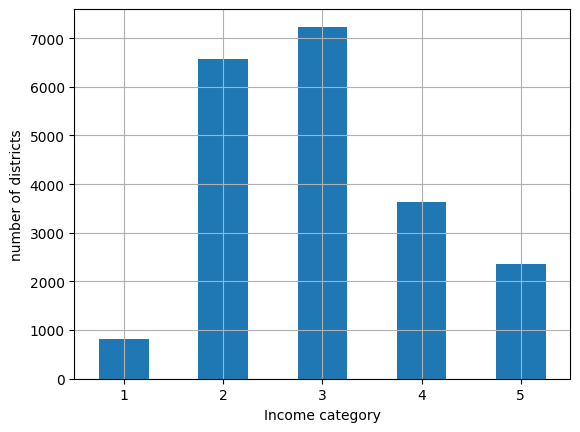

In [17]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income category')
plt.ylabel('number of districts')
plt.show()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(housing, housing['income_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

In [19]:
strat_train_set, strat_test_set=strat_splits[0]

In [20]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify = housing['income_cat'], random_state=42
)

In [21]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [22]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

In [23]:
housing = strat_train_set.copy()

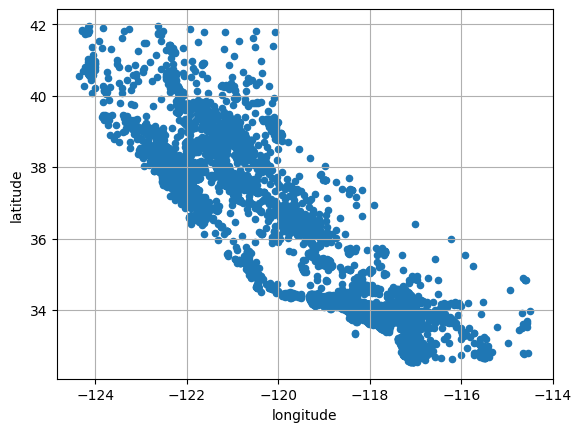

In [24]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
plt.show()

Bu, həqiqətən də California-ya bənzəyir, lakin bundan başqa hər hansı konkret bir pattern görmək çətindir. alpha parametrini 0.2-yə təyin etmək isə data points-lərin yüksək sıxlıqda toplandığı yerləri vizuallaşdırmağı xeyli asanlaşdırır.

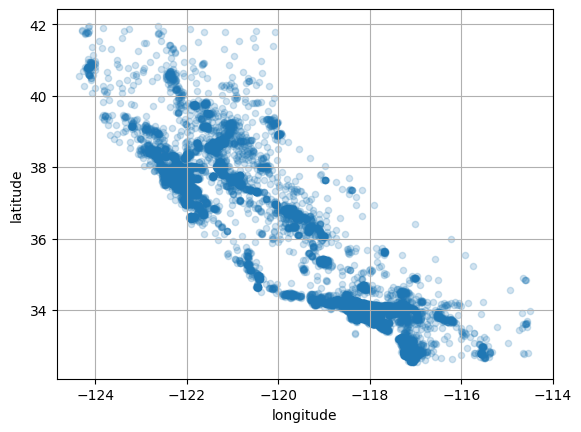

In [25]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show()

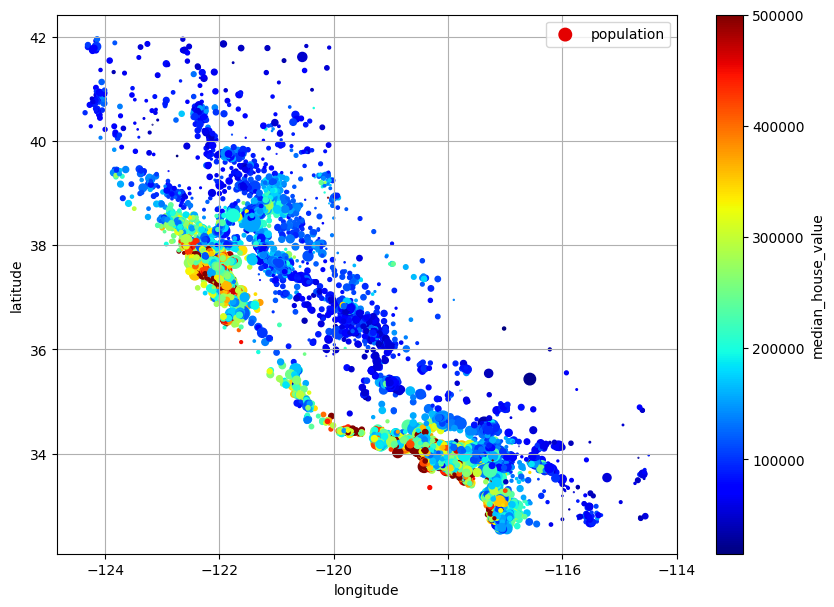

In [26]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True,
             s=housing['population'] / 100, label = 'population', c='median_house_value', cmap='jet', colorbar=True,
             legend=True, sharex=False, figsize=(10,7))
plt.show()



*   red is expensive

* blue is cheap

* larger circles indicate areas with a larger population



**Correlation coefficient** –1 ilə 1 arasında dəyişir.
* 1-ə yaxın olduqda, bu strong positive correlation deməkdir; məsələn, median income artdıqca median house value də artmağa meylli olur.
* Coefficient –1-ə yaxın olduqda isə bu strong negative correlation mənasını verir; məsələn, latitude ilə median house value arasında zəif mənfi korrelyasiya müşahidə olunur (yəni şimala doğru getdikcə qiymətlər azacıq aşağı düşməyə meyllidir).
* Nəhayət, 0-a yaxın olan coefficients isə linear correlation-un olmadığını göstərir.

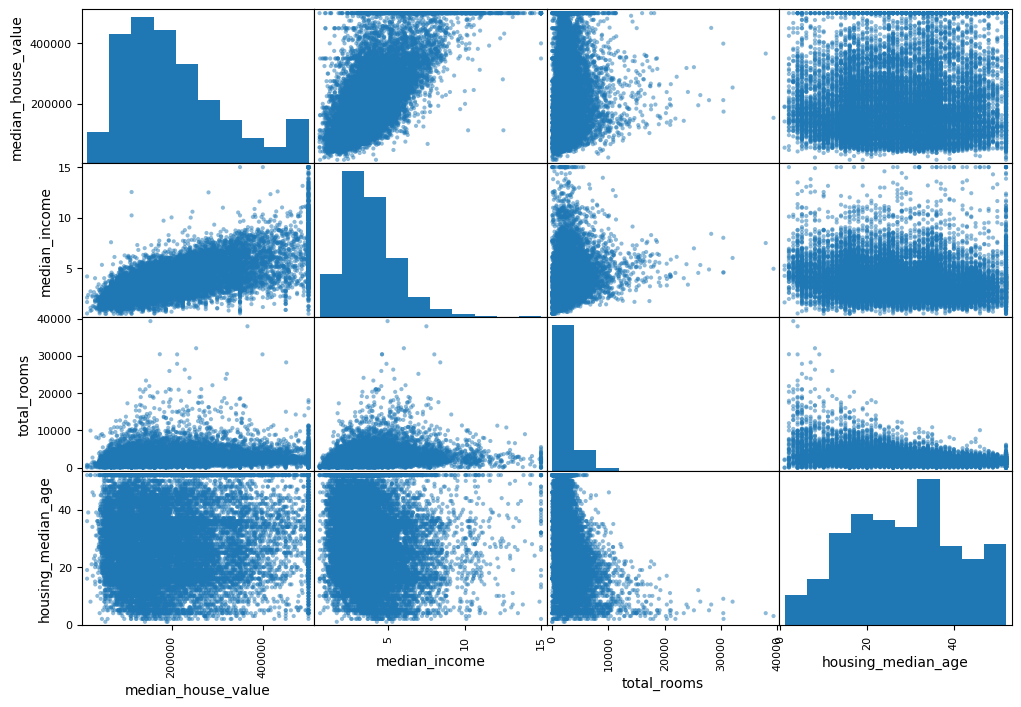

In [27]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

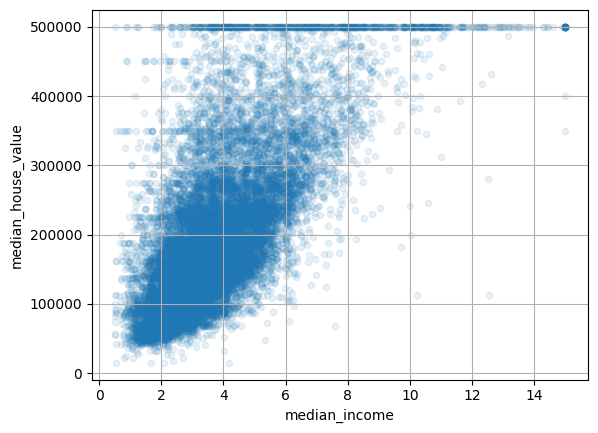

In [28]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha = 0.1, grid = True)
plt.show()

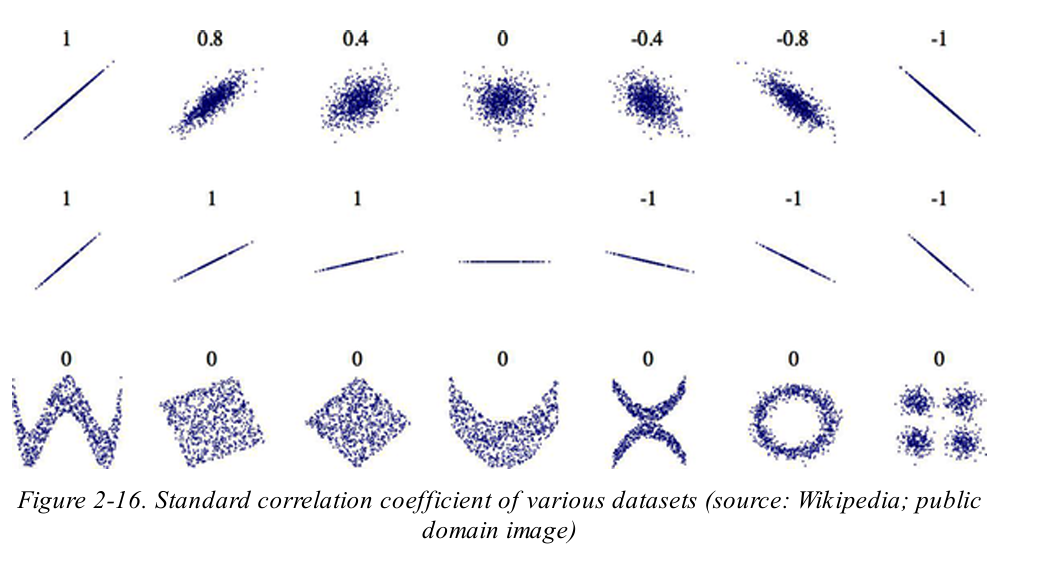

In [29]:
housing['rooms_per_house']=housing['total_rooms'] / housing['households']
housing['bedrooms_ratio']=housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house']=housing['population'] / housing['households']

In [30]:
corr_matrix = housing.drop('ocean_proximity', axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


In [31]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# Clean the Data

In [32]:
housing.dropna(subset=['total_bedrooms'], inplace=True)  #option 1
# housing.drop('total_bedrooms', axis=1)  #option 2
# median=housing['total_bedrooms'].median()  #option 3
# housing['total_bedrooms'].fillna(median, inplace=True)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
housing_num = housing.select_dtypes(include=[np.number])

In [35]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [37]:
X = imputer.transform(housing_num)

In [38]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [39]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [40]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [41]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [44]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16344 stored elements and shape (16344, 5)>

In [45]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
df_test=pd.DataFrame({'ocean_proximity':['INLAND','NEAR BAY']})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [48]:
cat_encoder.transform(df_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 5)>

In [49]:
df_test_unknown=pd.DataFrame({'ocean_proximity':['<2H OCEAN', 'ISLAND']})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [50]:
cat_encoder.handle_unknown='ignore'
cat_encoder.transform(df_test_unknown)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (2, 5)>

In [51]:
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()
df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                       columns=cat_encoder.get_feature_names_out(),
                       index=df_test_unknown.index)

In [52]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [53]:
df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                       columns=cat_encoder.get_feature_names_out(),
                       index=df_test_unknown.index)

# Feature Scaling and Transformation

In [54]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

In [55]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
housing_num_std_scaler=std_scaler.fit_transform(housing_num)

In [56]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35=rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

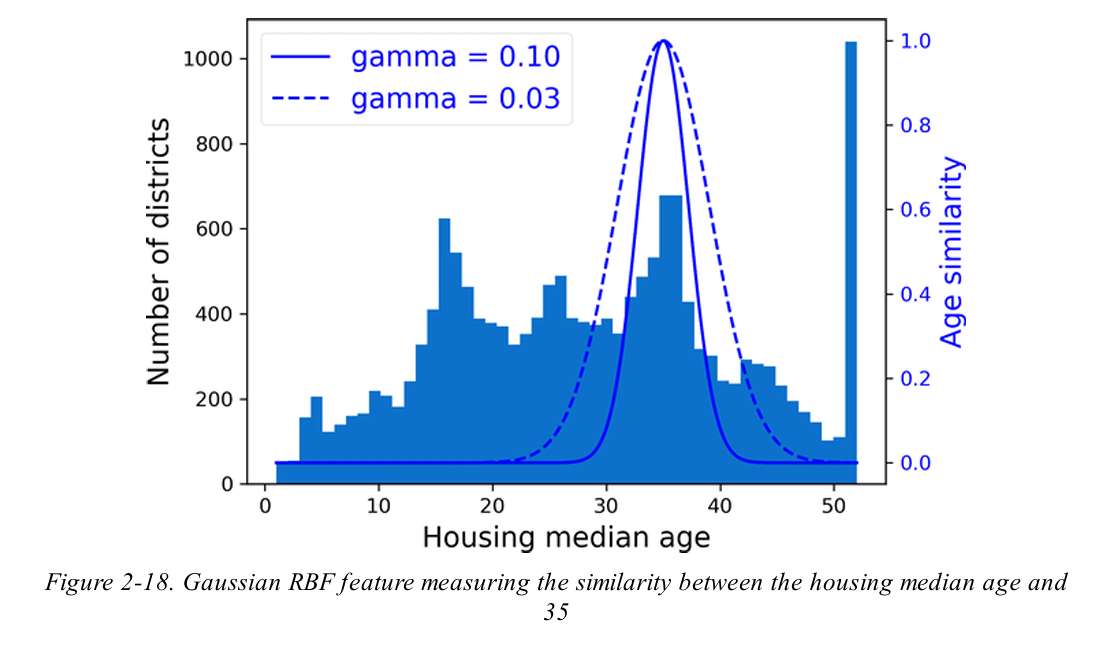

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Target scaler
target_scaler = StandardScaler()

# Label-i birbaşa housing-dən çıxar (indekslər 100% uyğun olur)
housing_labels = housing['median_income']

# Feature
housing_features = housing[['median_income']]

# Label scaling
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# Model
model = LinearRegression()
model.fit(housing_features, scaled_labels)

# New data
some_new_data = housing_features.iloc[:5]

# Prediction
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

print(predictions)


[[2.0987]
 [6.0876]
 [2.433 ]
 [2.2618]
 [3.5292]]


In [58]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions=model.predict(some_new_data)

#Custom Transformers

In [59]:
from sklearn.preprocessing import FunctionTransformer

log_transformer=FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [60]:
rbf_transformer=FunctionTransformer(rbf_kernel,
                                    kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[['housing_median_age']])

In [61]:
sf_coords=37.7749, -122.41
sf_transformer=FunctionTransformer(rbf_kernel,
                                   kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil=sf_transformer.transform(housing[['latitude', 'longitude']])

In [62]:
ratio_transformer=FunctionTransformer(lambda X: X[:,[0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean=with_mean

  def fit(self, X, y=None):
    X= check_array(X)
    self.mean=X.mean(axis=0)
    self.scale_=X.std(axis=0)
    self.n_features_in_=X.shape[1]
    return self

  def transform(self, X):
    check_is_fitted(self)
    X=check_array(X)
    assert self.n_features_in_==X.shape[1]
    if self.with_mean:
      X=X - self.mean
    return X / self.scale_

In [64]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma= gamma
    self.random_state=random_state

  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

In [65]:
cluster_simil=ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities=cluster_simil.fit_transform(housing[['latitude', 'longitude']],
                                         sample_weight=housing_labels)

In [66]:
similarities[:3].round(2)

array([[0.  , 0.84, 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.8 , 0.08],
       [0.62, 0.  , 0.  , 0.03, 0.  , 0.99, 0.  , 0.12, 0.  , 0.  ],
       [0.  , 0.49, 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.77, 0.45]])

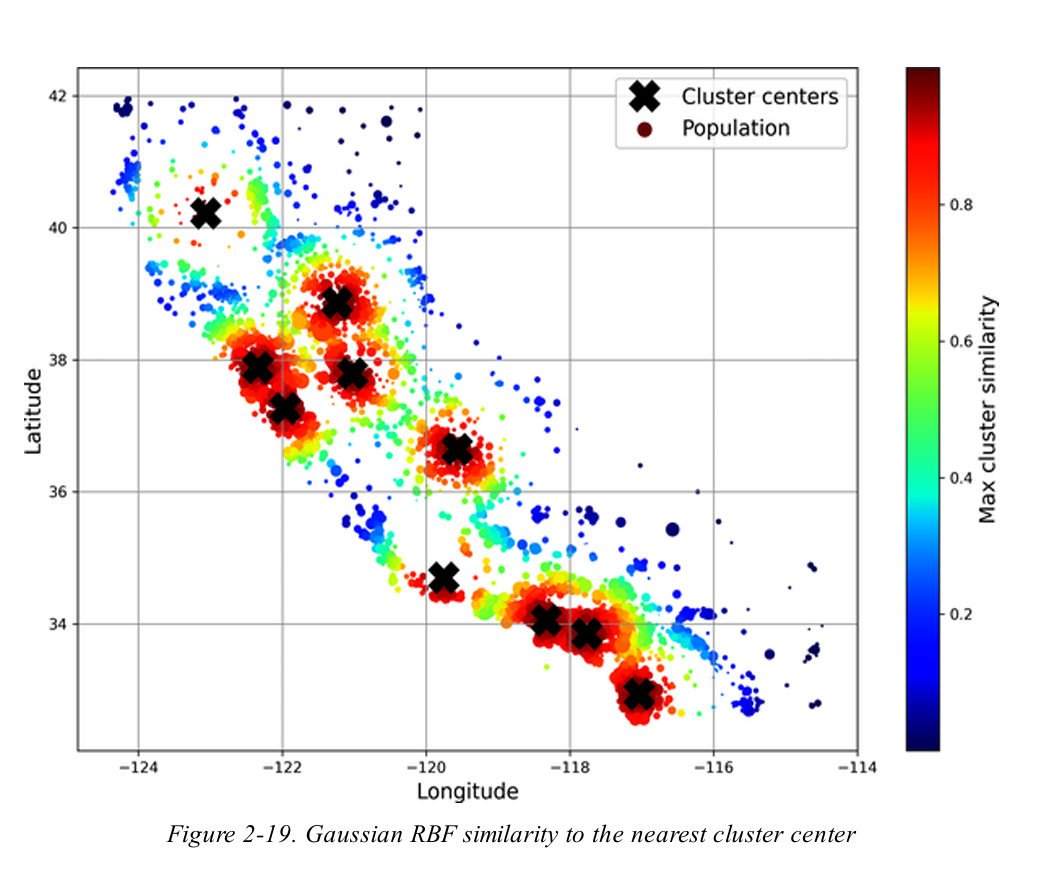

#Transformation Pipelines

In [67]:
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [68]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [69]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.36,  0.14,  1.4 , -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [70]:
df_housing_num_prepared=pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)

In [71]:
from sklearn.compose import ColumnTransformer

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income']
cat_attribs = ['ocean_proximity']

cat_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing=ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])


In [72]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)



In [73]:
housing_prepared=preprocessing.fit_transform(housing)

In [74]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [75]:
housing_prepared=preprocessing.fit_transform(housing)
housing_prepared.shape

(16344, 24)

In [76]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Train and Evaluate on the Training Set

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fc...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fce44148c50>)])),
                ('linearregression', LinearRegression())])

In [78]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)


array([0., 0., 0., 0., 0.])

In [79]:
housing_labels.iloc[:5].values

array([2.0987, 6.0876, 2.433 , 2.2618, 3.5292])

In [80]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
lin_rmse

np.float64(0.5689465333305598)

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fc...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fce44148c50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [82]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get predictions from the DecisionTreeRegressor
tree_housing_predictions = tree_reg.predict(housing)

# Calculate RMSE for the Decision Tree model
tree_rmse = np.sqrt(mean_squared_error(housing_labels, tree_housing_predictions))
tree_rmse

np.float64(1.351841215183094e-16)

In [83]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring='neg_root_mean_squared_error', cv=10)

In [84]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,0.008062
std,0.003521
min,0.002607
25%,0.006920
50%,0.007175
75%,0.009981
max,0.015150


In [86]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses=-cross_val_score(forest_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

# Fine-Tune Your Model

# Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters':[5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]}
]

grid_search=GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fce44148c50>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [88]:
cv_res=pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,19.354612,0.446133,0.202915,0.009076,10,10,"{'preprocessing__geo__n_clusters': 10, 'random...",-0.106788,-0.106251,-0.101603,-0.104881,0.002328,1
2,8.922968,0.103073,0.149870,0.001609,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_...",-0.122179,-0.103997,-0.096009,-0.107395,0.010951,2
5,17.683442,0.915549,0.268704,0.119923,8,8,"{'preprocessing__geo__n_clusters': 8, 'random_...",-0.133633,-0.129637,-0.125197,-0.129489,0.003446,3
14,13.012279,0.957642,0.165411,0.015503,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-0.141342,-0.144363,-0.136093,-0.140600,0.003417,4
8,15.603939,0.546339,0.272304,0.051946,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-0.149283,-0.140158,-0.146236,-0.145226,0.003793,5


# Randomized Search

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'preprocessing__geo__n_clusters': randint(low=3, high=50),
                'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs,n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)

In [96]:
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce37545d00>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce3707be00>},
                   random_state=42, scoring='neg_root_mean_squared_error')

#Ensemble Methods

# Analyzing the Best Models and Their Errors

In [99]:
final_model=rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
feature_importances.round(2)

array([0.2 , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.63, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.  ])

In [101]:
sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse=True)


[(np.float64(0.6286653769157394), 'log__median_income'),
 (np.float64(0.19907531910536186), 'bedrooms__ratio'),
 (np.float64(0.09363469684005156), 'rooms_per_house__ratio'),
 (np.float64(0.014019536424560655), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.006034221001196604), 'geo__Cluster 8 similarity'),
 (np.float64(0.0050571314803047876), 'geo__Cluster 14 similarity'),
 (np.float64(0.004706611661581829), 'log__total_rooms'),
 (np.float64(0.004015067277817697), 'geo__Cluster 19 similarity'),
 (np.float64(0.0037730308009323466), 'people_per_house__ratio'),
 (np.float64(0.0032284877987794206), 'geo__Cluster 18 similarity'),
 (np.float64(0.0030882200735064037), 'log__population'),
 (np.float64(0.0029981643895154774), 'geo__Cluster 20 similarity'),
 (np.float64(0.002723132494562413), 'geo__Cluster 2 similarity'),
 (np.float64(0.0026081456116576612), 'log__households'),
 (np.float64(0.0025970965746367498), 'log__total_bedrooms'),
 (np.float64(0.002307945347315977), 'remainder__housing_me

# Evaluate Your System on the Test Set

In [103]:
X_test=strat_test_set.drop('median_house_value', axis=1)
y_test=strat_test_set['median_house_value'].copy()

final_predictions=final_model.predict(X_test)

# Calculate MSE first, then take the square root to get RMSE
from sklearn.metrics import mean_squared_error
import numpy as np # Ensure numpy is imported

mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(mse)
print(final_rmse)

238834.78795710075


In [104]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([234783.49119083, 242818.50040982])

# Launch, Monitor, and Maintain Your System

In [105]:
import joblib

joblib.dump(final_model, 'my_california_housing_model.pkl')

['my_california_housing_model.pkl']